# A brief introduction to `KlipRetrieve`.

In [ ]:
from subtract_psf import KlipRetrieve

### Retrieve the two sets of data cubes (reference + target), then align them to enable PSF subtraction.

*(Two possible alignment strategies -- `'theoretical'` and `'empirical2'`. See **[`compare_aligns.ipynb`](compare_aligns.ipynb)** to compare their performance.)*

In [ ]:
kr = KlipRetrieve('../example_images/', align_style='empirical2')

in ../example_images/...
********
aligning all data cubes' images by their bright pixels...
********
********
removing padding from alignment process...
********
********
generating KLIP projections of target images in `self.klip_proj`...
********
********
generating pre-/post-subtraction contrast curves...
********
********
completed `self.pre_prof_hdu`, `self.post_prof_hdu`, `self.photon_prof_hdu`, and `self.pre_avg_hdu`.
********
********
injecting companion with (location-specific) 5-sigma intensity, after alignment.
********


### View plots of the alignment process to visualize each step.

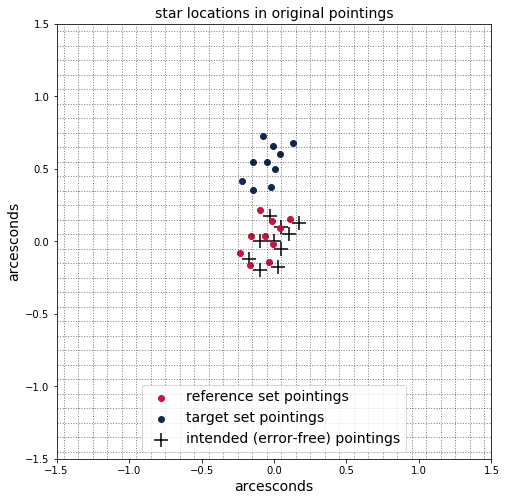

In [ ]:
kr.plot_original_pointings()

If you use the `'theoretical'` alignment style, you can also visualize what the star locations look like after being shifted from the above plot:

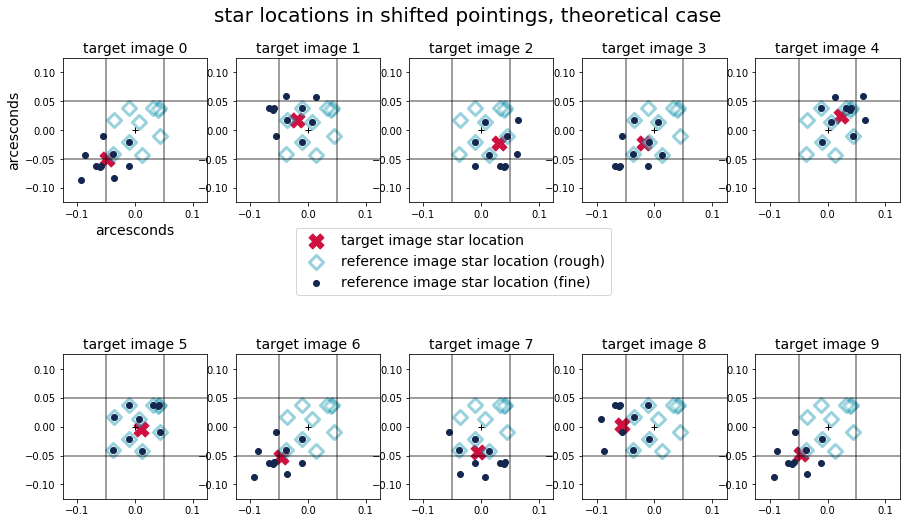

In [ ]:
kr_theo = KlipRetrieve('../example_images/', align_style='theoretical', verbose=False)
kr_theo.plot_shifted_pointings()

### Peform the PSF subtraction and see the results, slice-by-slice.

*(Toggle the `companion` argument in `plot_subtraction()` to view the scene with and without a companion.)*

Uncomment the first line of the following cell to randomize the companion's position. `inject_companion()` can also take an argument to set the factor by which to multiply the companion's brightness relative to the standard deviation of intensity for all pixels at its radial distance from the star.

To see an example of how to inject a companion *pre-alignment*, using real stellar and companion flux spectra, see __[`inject_kappa_and.ipynb`](inject_kappa_and.ipynb)__.


********
total intensity pre-subtract:  9.2950e-01
total intensity post-subtract: 9.5990e-03
********


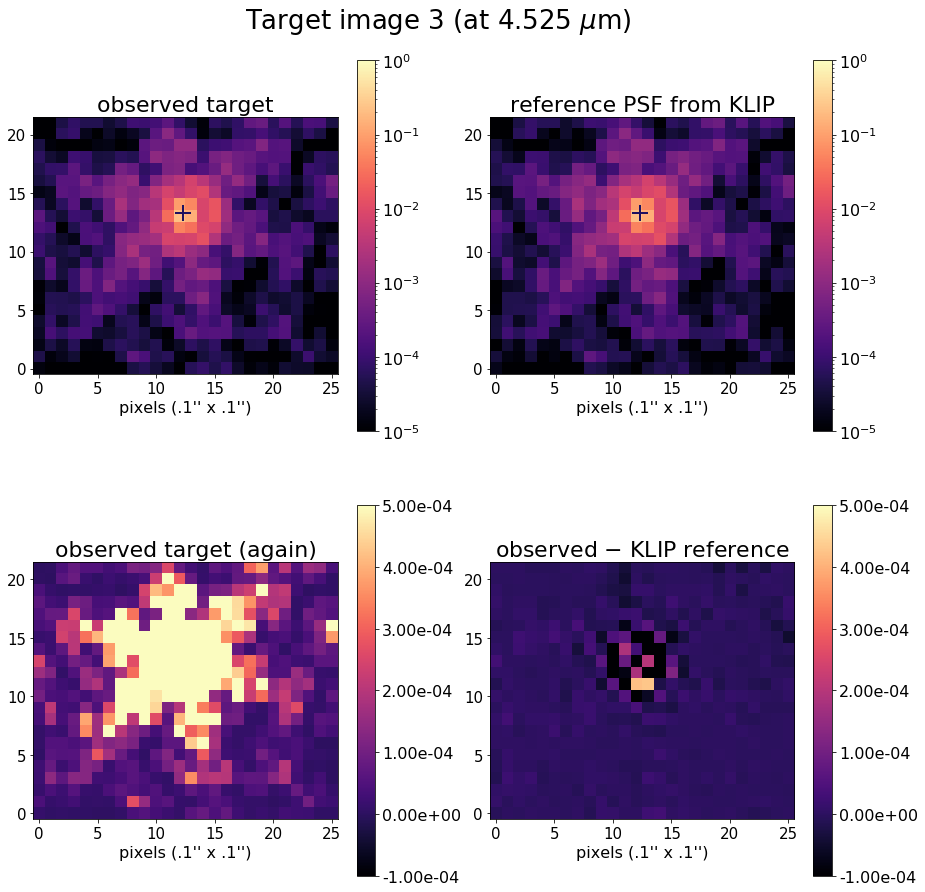

(0.9295004970184446, 0.009599044520897798)

In [ ]:
#kr.inject_companion(times_sigma=5)
kr.plot_subtraction(target_image=3, wv_slice=-2, companion=False)

### Compare contrast and separation curves for multiple wavelengths.


********
1 arcsecond contrast @2.87 microns
pre-sub:  1.2400e-03 | post-sub: 6.3126e-05
********

********
1 arcsecond contrast @4.11 microns
pre-sub:  2.2670e-03 | post-sub: 1.5240e-04
********

********
1 arcsecond contrast @4.94 microns
pre-sub:  3.3383e-03 | post-sub: 2.9314e-04
********


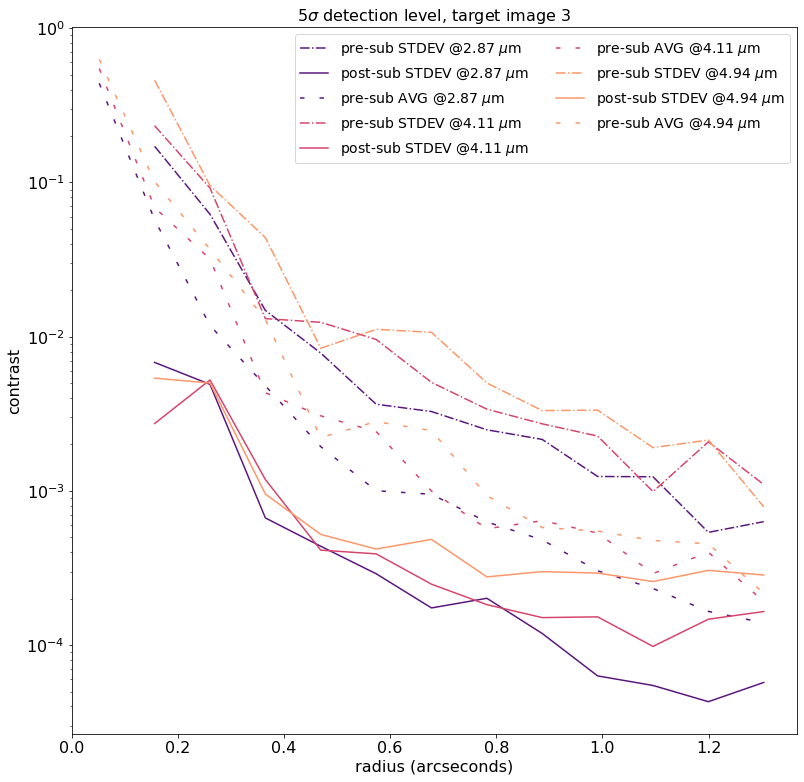

In [ ]:
kr.plot_contrasts(target_image=3, times_sigma=5, companion=False)

### Key attributes:

#### Image cubes:
- *`data_cubes`*, an HDUList containing the original data cubes used to initiate your `KlipRetrieve` instance. The first half is made up of the reference "observations", and the target/science observations are in the second half.
- *`stackable_cubes`*, an HDUList of data cubes where all slices are aligned and ready for PSF subtraction.
- *`injected_cubes`*, an HDUList of *target* data cubes from `stackable_cubes` that have been injected with a companion. (Created automatically through `inject_companion()`.)
- *`klip_proj`*, an HDUList of KLIP projections of the *target* data cubes in `stackable_cubes`. (Created automatically through `_generate_klip_proj()`.)
- *`subtracted_cubes`*, an HDUList of reference cubes from `stackable_cubes` and target cubes made from the difference between `injected_cubes` and the latter half of `stackable_cubes`.

#### Profile cubes:
- *`pre_prof_hdu`*, an HDUList containing radial profile information for the standard deviation of flux in the target images in `stackable_cubes` ("**pre**-subtraction").
- *`post_prof_hdu`*, an HDUList containing radial profile information for the standard deviation of flux when you subtract `injected_cubes`'s target images by their counterparts in `klip_proj` ("**post**-subtraction").
- *`pre_avg_hdu`*, an HDUList containing radial profile information for the *mean* of flux in the target images in `stackable_cubes`.

In [ ]:
kr.data_cubes.info()

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  REFERENCE0    1 ImageHDU       118   (30, 30, 6)   float64   
  1  REFERENCE1    1 ImageHDU       118   (30, 30, 6)   float64   
  2  REFERENCE2    1 ImageHDU       118   (30, 30, 6)   float64   
  3  REFERENCE3    1 ImageHDU       118   (30, 30, 6)   float64   
  4  REFERENCE4    1 ImageHDU       118   (30, 30, 6)   float64   
  5  REFERENCE5    1 ImageHDU       118   (30, 30, 6)   float64   
  6  REFERENCE6    1 ImageHDU       118   (30, 30, 6)   float64   
  7  REFERENCE7    1 ImageHDU       118   (30, 30, 6)   float64   
  8  REFERENCE8    1 ImageHDU       118   (30, 30, 6)   float64   
  9  REFERENCE9    1 ImageHDU       118   (30, 30, 6)   float64   
 10  TARGET0       1 ImageHDU       120   (30, 30, 6)   float64   
 11  TARGET1       1 ImageHDU       120   (30, 30, 6)   float64   
 12  TARGET2       1 ImageHDU       120   (30, 30, 6)   float64   
 13  TARGET3      

In [ ]:
kr.stackable_cubes.info()

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  REFERENCE0    1 ImageHDU       118   (26, 22, 6)   float64   
  1  REFERENCE1    1 ImageHDU       118   (26, 22, 6)   float64   
  2  REFERENCE2    1 ImageHDU       118   (26, 22, 6)   float64   
  3  REFERENCE3    1 ImageHDU       118   (26, 22, 6)   float64   
  4  REFERENCE4    1 ImageHDU       118   (26, 22, 6)   float64   
  5  REFERENCE5    1 ImageHDU       118   (26, 22, 6)   float64   
  6  REFERENCE6    1 ImageHDU       118   (26, 22, 6)   float64   
  7  REFERENCE7    1 ImageHDU       118   (26, 22, 6)   float64   
  8  REFERENCE8    1 ImageHDU       118   (26, 22, 6)   float64   
  9  REFERENCE9    1 ImageHDU       118   (26, 22, 6)   float64   
 10  TARGET0       1 ImageHDU       120   (26, 22, 6)   float64   
 11  TARGET1       1 ImageHDU       120   (26, 22, 6)   float64   
 12  TARGET2       1 ImageHDU       120   (26, 22, 6)   float64   
 13  TARGET3      

In [ ]:
kr.klip_proj.info()

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  TARGET0       1 ImageHDU       120   (26, 22, 6)   float64   
  1  TARGET1       1 ImageHDU       120   (26, 22, 6)   float64   
  2  TARGET2       1 ImageHDU       120   (26, 22, 6)   float64   
  3  TARGET3       1 ImageHDU       120   (26, 22, 6)   float64   
  4  TARGET4       1 ImageHDU       120   (26, 22, 6)   float64   
  5  TARGET5       1 ImageHDU       120   (26, 22, 6)   float64   
  6  TARGET6       1 ImageHDU       120   (26, 22, 6)   float64   
  7  TARGET7       1 ImageHDU       120   (26, 22, 6)   float64   
  8  TARGET8       1 ImageHDU       120   (26, 22, 6)   float64   
  9  TARGET9       1 ImageHDU       120   (26, 22, 6)   float64   


In [ ]:
kr.injected_cubes.info()

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  TARGET0       1 ImageHDU       123   (26, 22, 6)   float64   
  1  TARGET1       1 ImageHDU       123   (26, 22, 6)   float64   
  2  TARGET2       1 ImageHDU       123   (26, 22, 6)   float64   
  3  TARGET3       1 ImageHDU       123   (26, 22, 6)   float64   
  4  TARGET4       1 ImageHDU       123   (26, 22, 6)   float64   
  5  TARGET5       1 ImageHDU       123   (26, 22, 6)   float64   
  6  TARGET6       1 ImageHDU       123   (26, 22, 6)   float64   
  7  TARGET7       1 ImageHDU       123   (26, 22, 6)   float64   
  8  TARGET8       1 ImageHDU       123   (26, 22, 6)   float64   
  9  TARGET9       1 ImageHDU       123   (26, 22, 6)   float64   


In [ ]:
kr.subtracted_cubes.info()

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  REFERENCE0    1 ImageHDU       118   (26, 22, 6)   float64   
  1  REFERENCE1    1 ImageHDU       118   (26, 22, 6)   float64   
  2  REFERENCE2    1 ImageHDU       118   (26, 22, 6)   float64   
  3  REFERENCE3    1 ImageHDU       118   (26, 22, 6)   float64   
  4  REFERENCE4    1 ImageHDU       118   (26, 22, 6)   float64   
  5  REFERENCE5    1 ImageHDU       118   (26, 22, 6)   float64   
  6  REFERENCE6    1 ImageHDU       118   (26, 22, 6)   float64   
  7  REFERENCE7    1 ImageHDU       118   (26, 22, 6)   float64   
  8  REFERENCE8    1 ImageHDU       118   (26, 22, 6)   float64   
  9  REFERENCE9    1 ImageHDU       118   (26, 22, 6)   float64   
 10  TARGET0       1 ImageHDU       123   (26, 22, 6)   float64   
 11  TARGET1       1 ImageHDU       123   (26, 22, 6)   float64   
 12  TARGET2       1 ImageHDU       123   (26, 22, 6)   float64   
 13  TARGET3      

#### Observational attributes:

More information about the observations is avilable through `positions` (the dither cycle used in this set of observations), `draws_ref` and `draws_sci` (the true stellar position in each data cube due to pointing and dither errors -- `point_err_ax` & `dith_err_ax`), `lo_wv` and `hi_wv` (the wavelength range of the spectrograph, in meters), and `wvlnths` (all the wavelengths observed, also in meters. its length is equal to the number of slices in each data cube).

All non-List/HDUList attributes are listed below:

In [ ]:
{k:v for k,v in vars(kr).items()
 if not isinstance(v, list)
 and not k.startswith('_')}

{'dir_name': '../example_images/',
 'terminal_call': './make_img_dirs.py -n example_images -i 2 -os 4 -sl 6 -pterr True',
 'positions': array([[ 0.     ,  0.     ],
        [-0.175  , -0.125  ],
        [ 0.175  ,  0.125  ],
        [ 0.025  , -0.175  ],
        [-0.025  ,  0.175  ],
        [ 0.05   , -0.05   ],
        [-0.1    ,  0.     ],
        [ 0.05   ,  0.1    ],
        [ 0.1    ,  0.05   ],
        [-0.1    , -0.20001]]),
 'point_err_ax': array([[-0.06069782,  0.03729228],
        [-0.049204  ,  0.55215622]]),
 'dith_err_ax': array([[[ 1.74803738e-03,  7.70604456e-04],
         [-2.24410695e-04,  4.86368119e-03],
         [-1.21412584e-03, -4.68454596e-03],
         [-2.05157171e-03, -3.12363812e-03],
         [-7.54297551e-03,  1.25081924e-03],
         [ 7.86970028e-04, -8.14214189e-03],
         [-5.68782970e-05, -1.69247683e-03],
         [-1.84774311e-04,  5.69741073e-04],
         [ 5.12139802e-03,  2.99370773e-03],
         [-7.15241996e-03,  4.33043699e-04]],
 
     